In [ ]:
# Implement the Continuous Bag of Words (CBOW) Model. Stages can be:
# a. Data preparation
# b. Generate training data
# c. Train model
# d. Output

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import urllib.request
from bs4 import BeautifulSoup

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Step 1: Scrape and prepare text data
# Scraping a Wikipedia article
url = "https://en.wikipedia.org/wiki/Machine_learning"
article = urllib.request.urlopen(url).read()
parsed_article = BeautifulSoup(article, 'lxml')

# Extract text content from paragraphs
text = " ".join([p.text for p in parsed_article.find_all('p')])

In [8]:
# Text preprocessing - cleaning and tokenizing
text = re.sub('[^A-Za-z]+', ' ', text).lower()  # Remove special characters and convert to lowercase
sentences = sent_tokenize(text)  # Split into sentences
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]  # Tokenize each sentence

In [9]:
# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_data = [[word for word in sentence if word not in stop_words] for sentence in tokenized_sentences]

In [10]:
# Step 2: Generate Training Data (Context-Target Pairs)
# For CBOW, create context-target pairs for each word in each sentence
training_data = []
window_size = 2  # Use 2 words before and after the target word as context

for sentence in filtered_data:
    for i in range(window_size, len(sentence) - window_size):
        # Define context (surrounding words) and target (center word)
        context = [sentence[i - j] for j in range(window_size, 0, -1)] + [sentence[i + j] for j in range(1, window_size + 1)]
        target = sentence[i]
        training_data.append((context, target))

print("Sample context-target pairs:", training_data[:5])

Sample context-target pairs: [(['machine', 'learning', 'field', 'study'], 'ml'), (['learning', 'ml', 'study', 'artificial'], 'field'), (['ml', 'field', 'artificial', 'intelligence'], 'study'), (['field', 'study', 'intelligence', 'concerned'], 'artificial'), (['study', 'artificial', 'concerned', 'development'], 'intelligence')]


In [11]:
# Step 3: Train the CBOW model
# Define and train the Word2Vec model with CBOW (sg=0)
model = Word2Vec(filtered_data, vector_size=50, window=window_size, min_count=1, sg=0)

# Display vocabulary
vocabulary = model.wv.index_to_key
print("Vocabulary:", vocabulary)

Vocabulary: ['learning', 'machine', 'data', 'model', 'training', 'algorithms', 'used', 'set', 'artificial', 'models', 'algorithm', 'ai', 'methods', 'also', 'systems', 'based', 'neural', 'examples', 'example', 'field', 'supervised', 'classification', 'many', 'theory', 'input', 'often', 'unsupervised', 'one', 'feature', 'networks', 'using', 'called', 'system', 'techniques', 'knowledge', 'trained', 'may', 'process', 'problems', 'network', 'analysis', 'new', 'decision', 'compression', 'performance', 'output', 'time', 'research', 'function', 'computer', 'human', 'predictions', 'regression', 'known', 'perform', 'intelligence', 'neurons', 'mining', 'approaches', 'including', 'signal', 'given', 'features', 'represented', 'rule', 'image', 'use', 'learned', 'include', 'method', 'variables', 'detection', 'e', 'biases', 'make', 'tasks', 'statistical', 'related', 'mathematical', 'learn', 'software', 'would', 'class', 'different', 'inputs', 'deep', 'without', 'predict', 'dictionary', 'non', 'program

In [12]:
# Step 3: Train the CBOW model
# Define and train the Word2Vec model with CBOW (sg=0)
model = Word2Vec(filtered_data, vector_size=50, window=window_size, min_count=1, sg=0)

# Display vocabulary
vocabulary = model.wv.index_to_key
print("Vocabulary:", vocabulary)

Vocabulary: ['learning', 'machine', 'data', 'model', 'training', 'algorithms', 'used', 'set', 'artificial', 'models', 'algorithm', 'ai', 'methods', 'also', 'systems', 'based', 'neural', 'examples', 'example', 'field', 'supervised', 'classification', 'many', 'theory', 'input', 'often', 'unsupervised', 'one', 'feature', 'networks', 'using', 'called', 'system', 'techniques', 'knowledge', 'trained', 'may', 'process', 'problems', 'network', 'analysis', 'new', 'decision', 'compression', 'performance', 'output', 'time', 'research', 'function', 'computer', 'human', 'predictions', 'regression', 'known', 'perform', 'intelligence', 'neurons', 'mining', 'approaches', 'including', 'signal', 'given', 'features', 'represented', 'rule', 'image', 'use', 'learned', 'include', 'method', 'variables', 'detection', 'e', 'biases', 'make', 'tasks', 'statistical', 'related', 'mathematical', 'learn', 'software', 'would', 'class', 'different', 'inputs', 'deep', 'without', 'predict', 'dictionary', 'non', 'program

In [15]:
# Visualize word embeddings using PCA
X = model.wv[model.wv.index_to_key]  # Extract all word vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

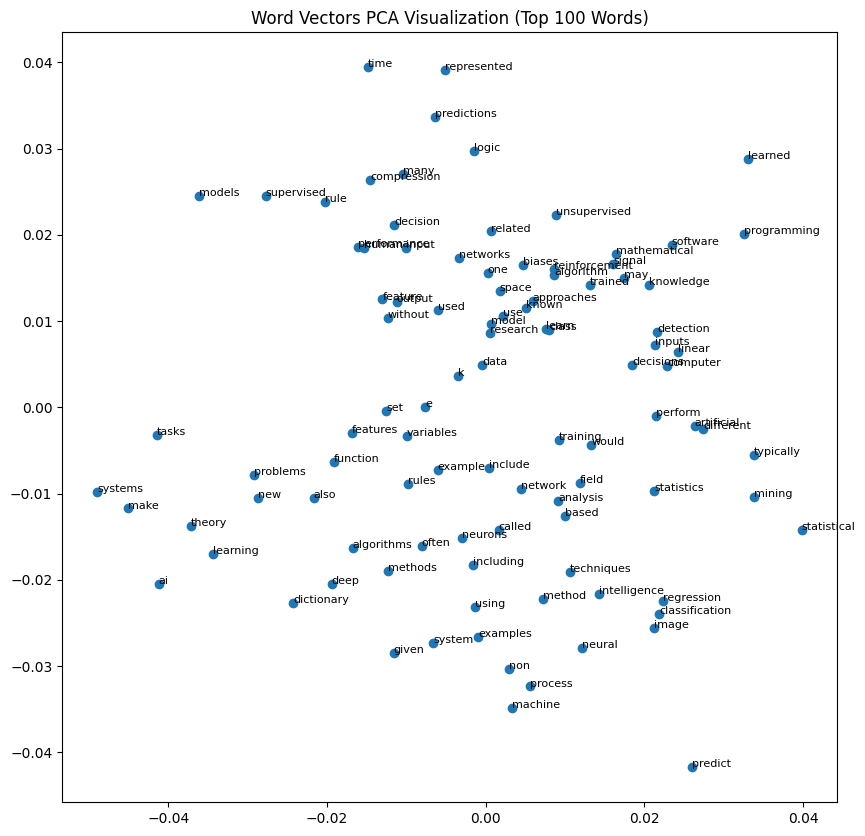

In [18]:
# Plot the PCA results with reduced clutter
plt.figure(figsize=(10, 10))

# Choose a subset of words to plot (e.g., top 100 words by frequency)
subset_words = list(model.wv.index_to_key)[:100]
subset_vectors = np.array([model.wv[word] for word in subset_words])

# Apply PCA to the subset
pca = PCA(n_components=2)
subset_result = pca.fit_transform(subset_vectors)

plt.scatter(subset_result[:, 0], subset_result[:, 1])

# Annotate words with a smaller font size to reduce clutter
for i, word in enumerate(subset_words):
    plt.annotate(word, xy=(subset_result[i, 0], subset_result[i, 1]), fontsize=8)

plt.title("Word Vectors PCA Visualization (Top 100 Words)")
plt.show()